# New Insight

### Load libraries and data

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# Load the data
users = pd.read_csv('/Users/rohanshah_95/Desktop/Fetch/Clean data/USER_TAKEHOME.csv')
transactions = pd.read_csv('/Users/rohanshah_95/Desktop/Fetch/Clean data/TRANSACTION_TAKEHOME.csv')

### Join USER and TRANSACTION data

In [3]:
# Merge the transactions and users data
merged_data = transactions.merge(users, left_on='USER_ID', right_on='ID')

### Change date format and calculate age

In [4]:
# Convert PURCHASE_DATE to datetime
merged_data['PURCHASE_DATE'] = pd.to_datetime(merged_data['PURCHASE_DATE'], format='%m/%d/%y', errors='coerce')

# Convert BIRTH_DATE to datetime and calculate age
merged_data['BIRTH_DATE'] = pd.to_datetime(merged_data['BIRTH_DATE'], errors='coerce')
merged_data['AGE'] = merged_data['PURCHASE_DATE'].dt.year - merged_data['BIRTH_DATE'].dt.year

### Calculate and plot spending by Age Groups

/var/folders/0b/5xq59jgj0ngf60vzn1_4pgl80000gn/T/ipykernel_5366/3083461038.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_spending = merged_data.groupby('AGE_GROUP')['FINAL_SALE'].sum()


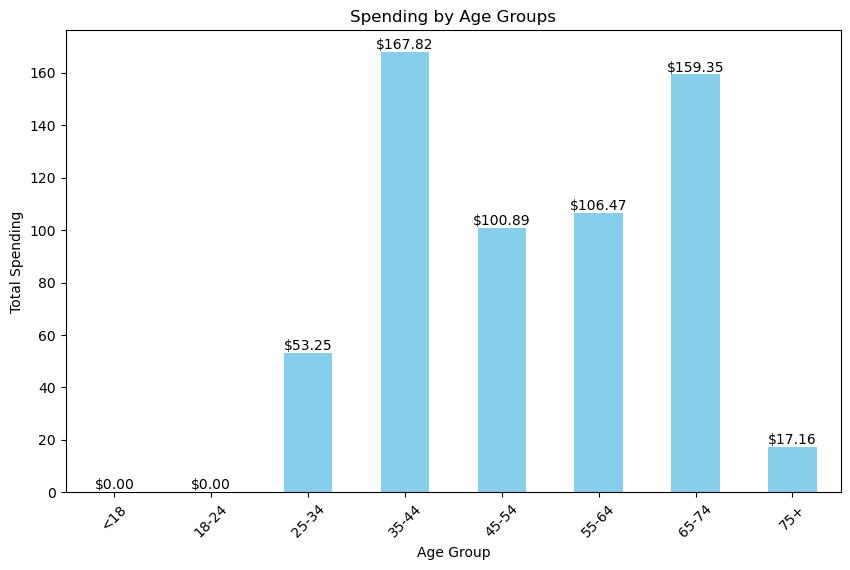

In [5]:
# Calculate and group spending
age_bins = [0, 18, 25, 35, 45, 55, 65, 75, 100]
age_labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75+']
merged_data['AGE_GROUP'] = pd.cut(merged_data['AGE'], bins=age_bins, labels=age_labels, right=False)
age_group_spending = merged_data.groupby('AGE_GROUP')['FINAL_SALE'].sum()

# Plot spending by age groups
plt.figure(figsize=(10, 6))
age_group_spending.plot(kind='bar', title='Spending by Age Groups', color='skyblue', xlabel='Age Group', ylabel='Total Spending')
plt.xticks(rotation=45)
for idx, value in enumerate(age_group_spending):
    plt.text(idx, value, f"${value:,.2f}", ha='center', va='bottom')
plt.show()

### Calculate and plot spending by Top 10 States

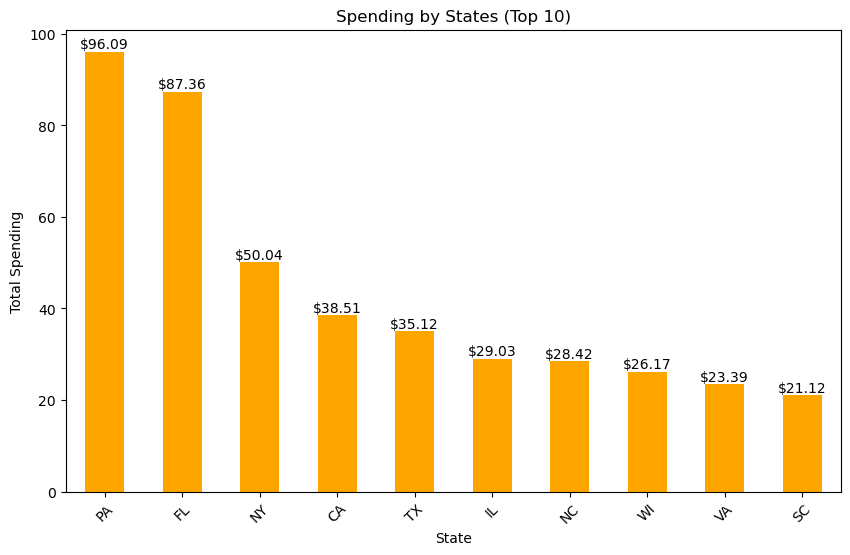

In [6]:
# Calculate and group spending
state_spending = merged_data.groupby('STATE')['FINAL_SALE'].sum().sort_values(ascending=False).head(10)

# Plot spending by States (Top 10)
plt.figure(figsize=(10, 6))
state_spending.plot(kind='bar', title='Spending by States (Top 10)', color='orange', xlabel='State', ylabel='Total Spending')
plt.xticks(rotation=45)
for idx, value in enumerate(state_spending):
    plt.text(idx, value, f"${value:,.2f}", ha='center', va='bottom')
plt.show()

### Calculate and plot spending by Top 10 Stores

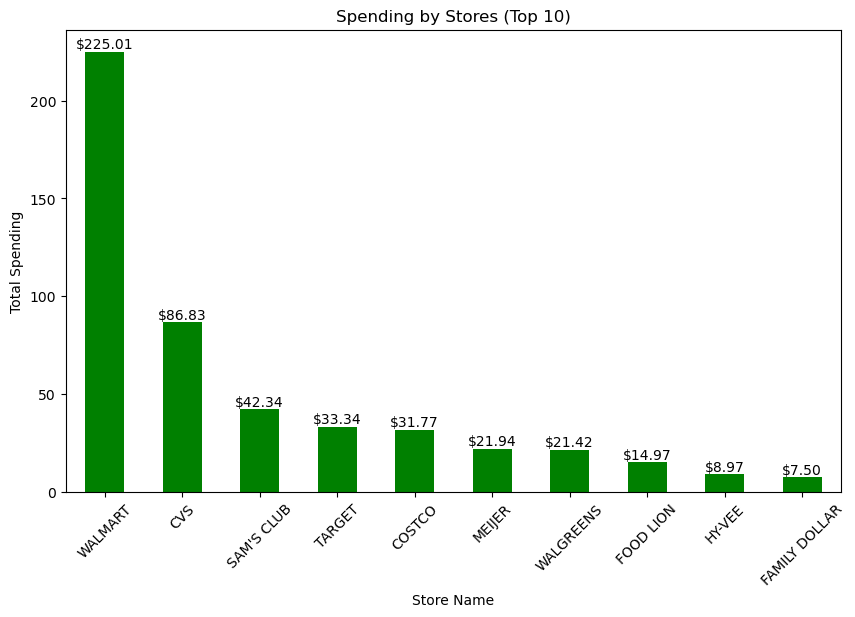

In [7]:
# Calculate and group spending
store_spending = merged_data.groupby('STORE_NAME')['FINAL_SALE'].sum().sort_values(ascending=False).head(10)

# Plot spending by Stores (Top 10)
plt.figure(figsize=(10, 6))
store_spending.plot(kind='bar', title='Spending by Stores (Top 10)', color='green', xlabel='Store Name', ylabel='Total Spending')
plt.xticks(rotation=45)
for idx, value in enumerate(store_spending):
    plt.text(idx, value, f"${value:,.2f}", ha='center', va='bottom')
plt.show()

## Observations
### Spending distribution by Age Groups
People between the age group of 35-44 are the highest spenders (USD 167.82), followed by 65-74 (USD 159.35), followed by 55-64 (USD 106.47)
### Spending distribution by State
People in PA are the highest spenders (USD 96.09), followed by FL (USD 87.36), followed by NY (USD 50.04)
### Spending distribution by Store
People spend the most in Walmart (USD 225.01), followed by CVS (USD 86.83), followed by SAM CLUB (USD 42.34)